In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import codecs

In [40]:
df = pd.read_csv('trade_data.csv')

In [41]:
#delete old index, relic of data create
del df['Unnamed: 0']

In [42]:
df

,Country,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Exporter,Form
0,Malaysia,4545.0,NaN,5000.0,6200.0,3360.0,2134066.0,7438586.0,51542562.0,16674849.0,22938134.0,9487335.0,Australia,Metal
1,New Zealand,546.0,1462.0,1272.0,1729.0,302.0,57.0,64.0,304.0,268.0,7409.0,2.0,Australia,Metal
2,South Africa,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Australia,Metal
3,Tanzania (United Rep. of),NaN,NaN,NaN,NaN,29.0,175.0,251.0,NaN,NaN,NaN,NaN,Australia,Metal
4,Taiwan,NaN,NaN,990.0,780.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia,Metal
5,Turkey,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,Australia,Metal
6,Sweden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia,Metal
7,Saudi Arabia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,Australia,Metal
8,Qatar,NaN,NaN,800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia,Metal
9,Philippines,NaN,2234.0,NaN,139.0,NaN,NaN,NaN,NaN,NaN,200.0,NaN,Australia,Metal


In [43]:
df['Form'].unique()

array(['Metal', 'Oxide'], dtype=object)

In [44]:
#make sure 2017 has only values and no strings (e.g. country names/form)
df['2017'].unique()

array([  9.48733500e+06,   2.00000000e+00,   1.00000000e+00,
                    nan,   1.00310000e+04,   6.81000000e+03,
         3.30000000e+01,   4.00000000e+00,   5.12100000e+03,
         4.00000000e+02,   6.00000000e+01,   5.14970400e+06,
         3.40085600e+06,   3.09575700e+06,   1.87562300e+06,
         1.00714000e+06,   9.74700000e+05,   8.44467000e+05,
         8.26719000e+05,   7.08806000e+05,   5.23800000e+05,
         4.70093000e+05,   4.33237000e+05,   4.23092000e+05,
         3.17100000e+05,   3.13882000e+05,   2.48947000e+05,
         2.33127000e+05,   1.90850000e+05,   1.81353000e+05,
         1.76001000e+05,   1.69900000e+05,   1.31774000e+05,
         1.04372000e+05,   1.02116000e+05,   9.80400000e+04,
         8.95000000e+04,   6.71700000e+04,   6.62440000e+04,
         5.96510000e+04,   5.42160000e+04,   5.14400000e+04,
         4.61990000e+04,   4.19770000e+04,   2.67100000e+04,
         2.61040000e+04,   2.45200000e+04,   2.20000000e+04,
         1.92000000e+04,

In [45]:
#make sure exporter has only countries
df['Exporter'].unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada',
       "China (People's Republic of)", 'Estonia', 'France', 'Germany',
       'Hong Kong', 'India', 'Italy', 'Japan', 'Korea (Rep. of)',
       'Malaysia', 'Netherlands', 'Russian Federation', 'South Africa',
       'Singapore', 'Spain', 'Taiwan', 'Thailand', 'United Kingdom',
       'United States', 'Viet-Nam'], dtype=object)

In [46]:
df.loc[df['Exporter'] == 'Oxide']

,Country,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Exporter,Form


In [47]:
sorted_df = df.sort_values(['2016'], ascending=False)

In [48]:
total_2016 = df['2016'].sum()

In [49]:
total_2016

157785452.0

In [50]:
top_n = sorted_df['2016'].iloc[:25].sum()

In [51]:
top_n/total_2016

0.7754058213174178

In [72]:
one_percent = total_2016*.01

In [52]:
total_sum_list = []

In [74]:
one_percent_df = df[df['2016'] > one_percent]

In [78]:
one_percent_sum = one_percent_df['2016'].sum()

In [80]:
one_percent_sum/total_2016

0.7232810094558021

In [81]:
len(one_percent_df)

19

In [53]:
def total_trend(column):
    sum = column.sum()
    total_sum_list.append(sum)

In [54]:
df[['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']].apply(total_trend)

2007    None
2008    None
2009    None
2010    None
2011    None
2012    None
2013    None
2014    None
2015    None
2016    None
dtype: object

In [55]:
total_sum_list

[148858369.0,
 140429811.0,
 103575741.0,
 133745793.0,
 120986164.0,
 99548012.0,
 107307427.0,
 163536926.0,
 134175642.0,
 157785452.0]

In [56]:
y = total_sum_list
x = ['2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016']

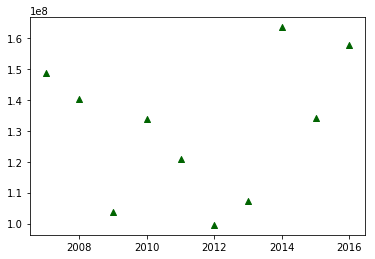

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x,y, color='darkgreen', marker='^')
plt.show()